<a href="https://colab.research.google.com/github/Mehak-kr/Zomato-Data-Ananlysis/blob/main/Zomato_Data_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/Zomato-data-.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


This data contains name, online_order, book_table, rating,votes, cost for two people and the type of restaurant.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


The dataset had 5 object columns and 2 integer columns (non-null). The rate column was stored incorrectly, so I need convert it into float to capture fractional values.

In [27]:
value=df['rate']
def handlingRate(value):
  value=str(value).split('/')
  value =  value[0]
  return float(value)

df['rate']=df['rate'].apply(handlingRate)
np.dtype(df['rate'])


dtype('float64')

The rating column was originally in fractional format (e.g; 4.1/5). I extracted the numeric part and converted it into float values. The column’s datatype was also changed from object to float for proper analysis.

In [35]:
col_name={'name':'Customer Name','online_order':'Online Order','book_table':'Booked Table','rate':'Rating','votes':'Vote by Customer',
         'approx_cost(for two people)':'Couple Cost','listed_in(type)':'Type of Restaurant'}
df.rename(columns=col_name,inplace=True)

In the dataset, we renamed the columns with more meaningful names to make the data easier to understand for others.

In [36]:
df.isnull().count()

,0
Customer Name,148
Online Order,148
Booked Table,148
Rating,148
Vote by Customer,148
Couple Cost,148
Type of Restaurant,148


he dataset does not contain any null values. After performing the necessary cleaning and transformations, the data is now ready for insightful analysis

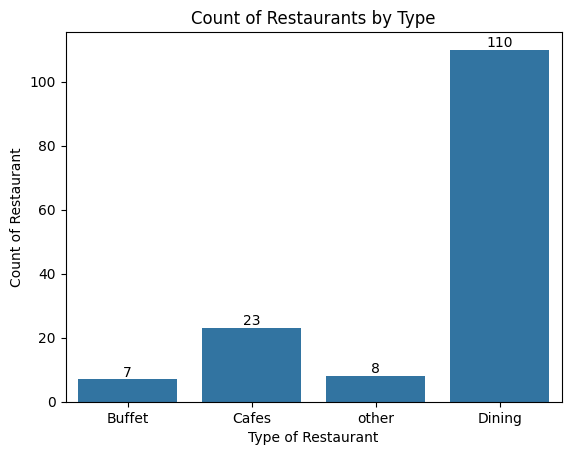

In [54]:
count=sns.countplot(x=df['Type of Restaurant'])
for i in count.containers:
  count.bar_label(i)
plt.xlabel('Type of Restaurant')
plt.ylabel('Count of Restaurant')
plt.title('Count of Restaurants by Type')
plt.show()

This section shows the count of restaurants by type. Dining restaurants have the highest count, whereas buffet restaurants have the lowest.

Text(0.5, 1.0, 'Count of Voting by Type')

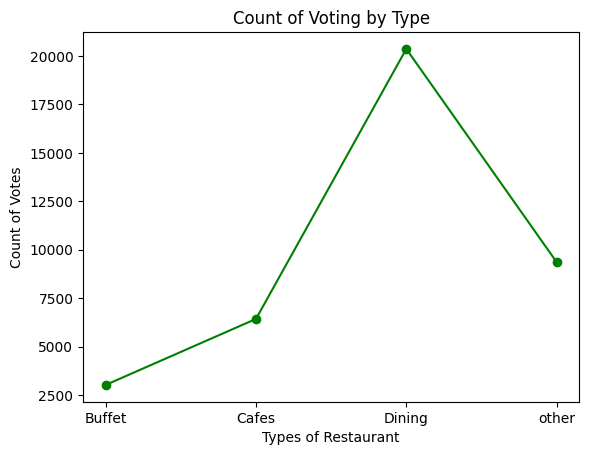

In [69]:
grouped_data=df.groupby(df['Type of Restaurant'])['Vote by Customer'].sum()
grouped_data
result=pd.DataFrame({'Votes':grouped_data})
result
plt.plot(result,marker='o',color='green')
plt.xlabel('Types of Restaurant')
plt.ylabel('Count of Votes')
plt.title('Count of Voting by Type')

This section shows the count of voting by Type. Dining restaurant have the highest votes.

In [79]:
# Most voted restaurant
higly_recommended=df['Vote by Customer'].max()
higly_recommended_restaurant=df.loc[df['Vote by Customer']==higly_recommended,'Customer Name']
higly_recommended_restaurant

,Customer Name
38,Empire Restaurant


This sections show the highly recommended restaurant voted by the customer.

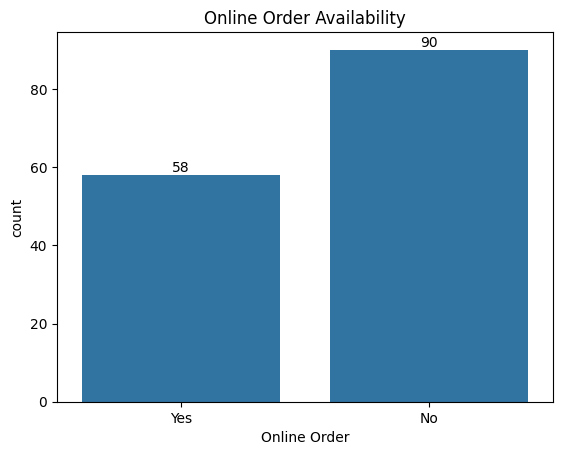

In [87]:
count=sns.countplot(x=df['Online Order'])
for i in count.containers:
  count.bar_label(i)
plt.title('Online Order Availability')
plt.show()

This shows most of the restaurant do not accept online orders.

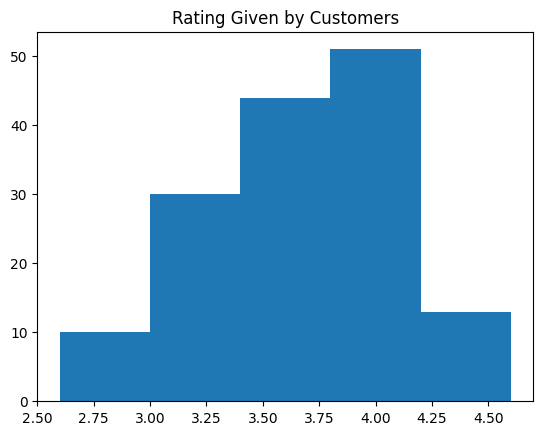

In [93]:
plt.hist(df['Rating'],bins=5)
plt.title('Rating Given by Customers')
plt.show()

The majority of restaurants received rating between 3.5 to 4

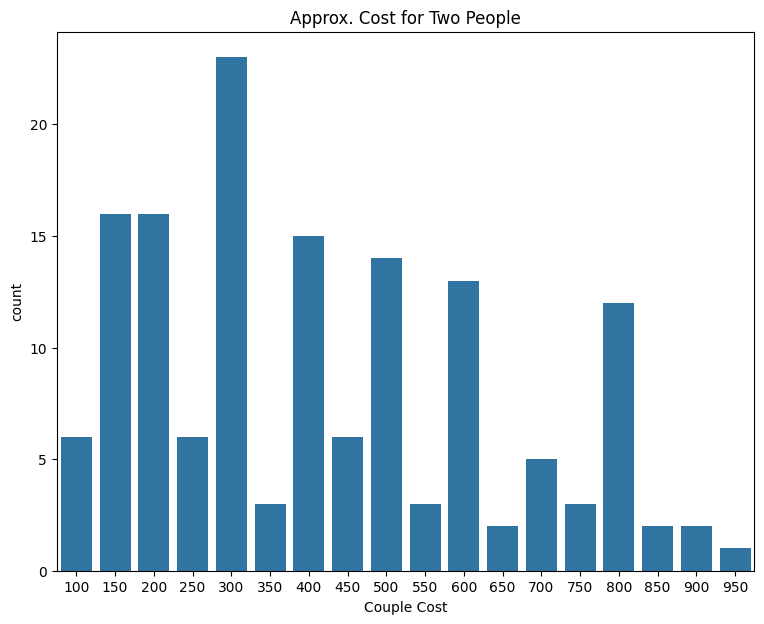

In [116]:
plt.figure(figsize=(9,7))
sns.countplot(x=df['Couple Cost'])
plt.title('Approx. Cost for Two People')
plt.show()

This charts shows the approx price for two people. The most preferred price range is 300.

Text(0.5, 1.0, 'Online vs offline Ratings')

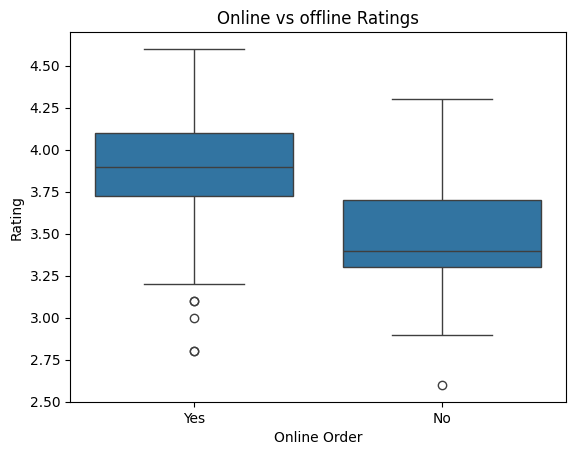

In [133]:
sns.boxplot(x=df['Online Order'],y=df['Rating'])
plt.title('Online vs offline Ratings')

Online orders have received higher ratings compared to offline orders.

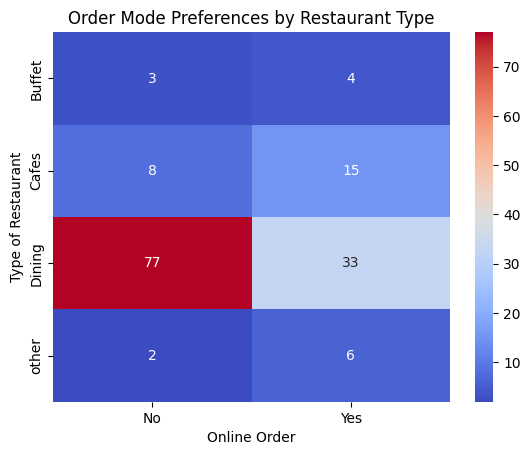

In [137]:
pivot_table=df.pivot_table(index='Type of Restaurant',columns='Online Order',aggfunc='size',fill_value=0)
pivot_table
sns.heatmap(pivot_table,annot=True,cmap='coolwarm')
plt.title('Order Mode Preferences by Restaurant Type')
plt.show()

This shows most of the Dinning restaurant preffered offline orders whereas cafes preffers online orders. This indicates that customers prefer to place orders in person at restaurants but rely on online ordering when visiting cafes.